Data Augmentation Approach. Increase dataset x 4:
1. Original wav, with time masking
2. Original wav with frequency masking
3. Wav with added noise and pitch shift with time masking
4. Wav with added noise and pitch shift with frequency masking

In [32]:
from audiomentations import Compose, TimeMask, SpecFrequencyMask, PitchShift, AddGaussianNoise
import pandas as pd
import numpy as np
import os
import time
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pydub import AudioSegment
from librosa.feature.inverse import mel_to_audio

In [33]:
def create_spectrogram(wav_path, sr=16000):

    y, sr = librosa.load(wav_path)

    # Create mel spectrogram
    mel_spect = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_mels=128,  # Number of mel bands
        fmax=8000    # Maximum frequency
    )

    # Convert to log scale and return
    return np.array(librosa.power_to_db(mel_spect, ref=np.max))

wav_path = '../raw_data/test/0_4753_4846_OffMenu263.wav'
spectrogram = create_spectrogram(wav_path)

(128, 216)

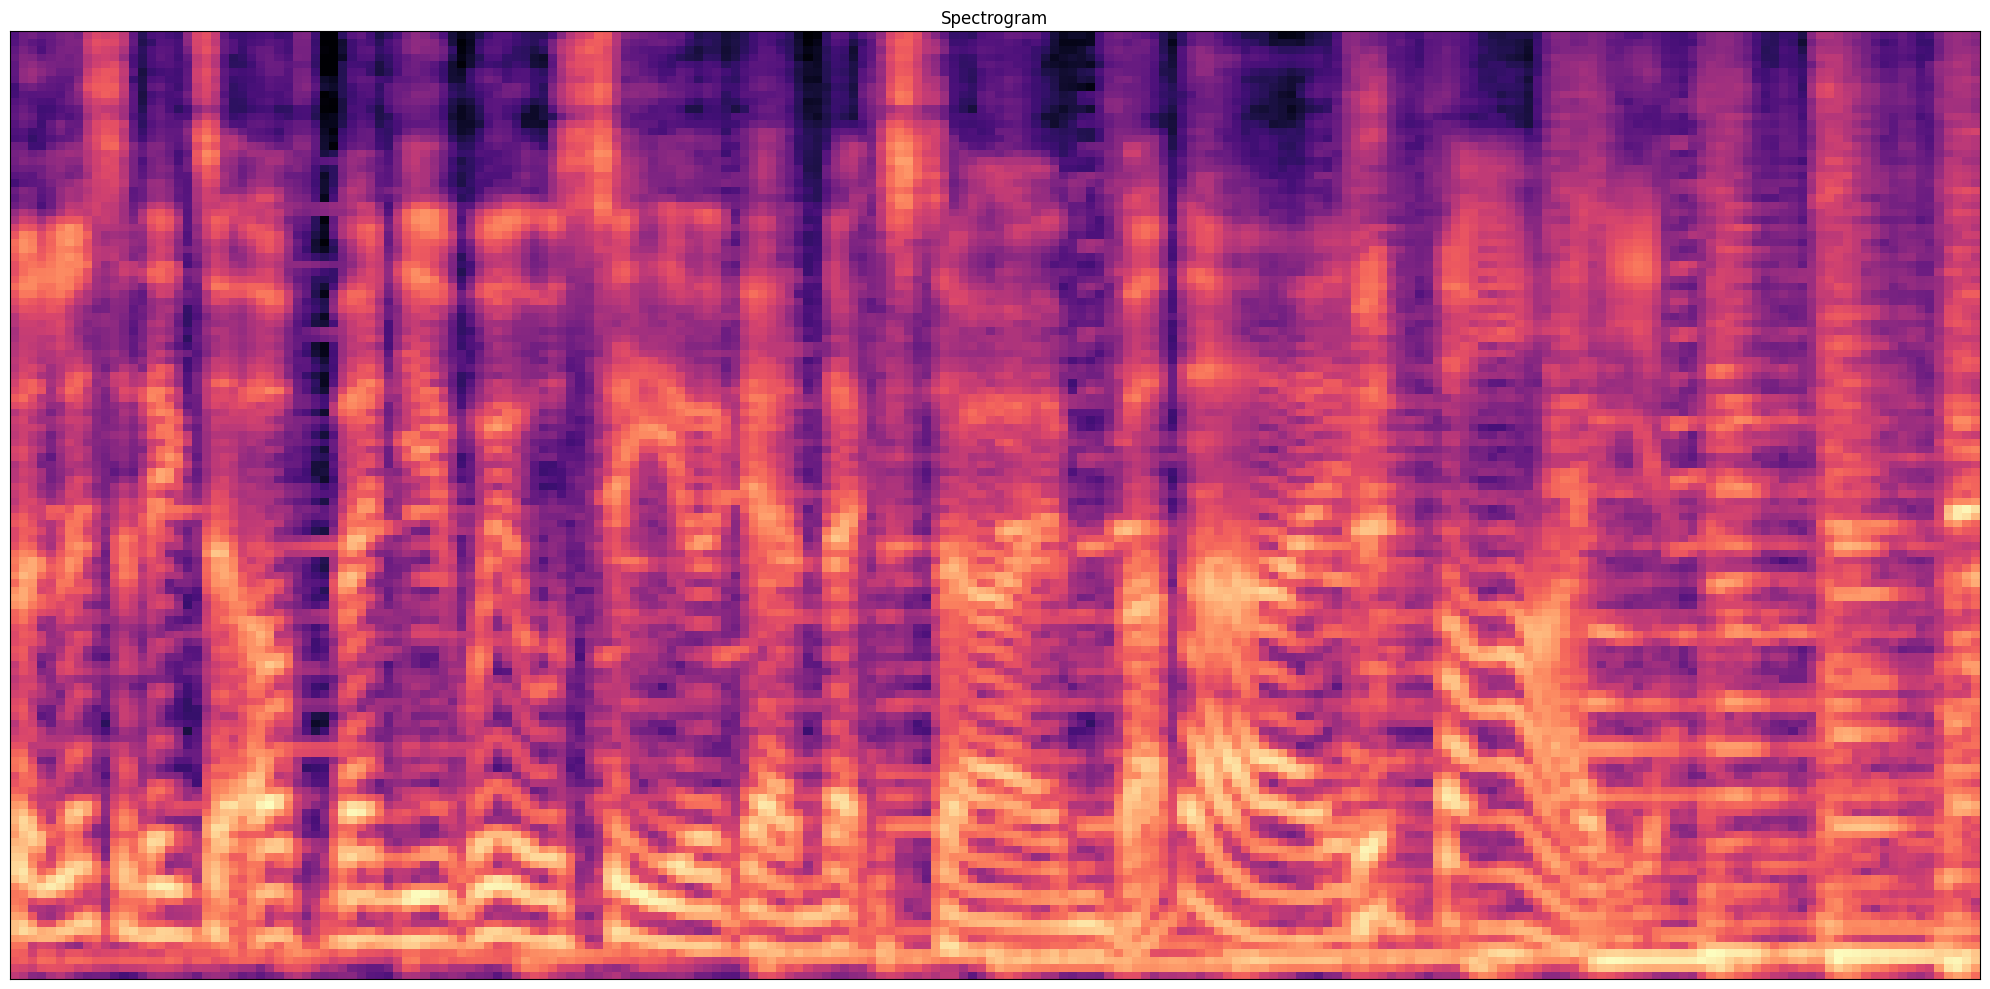

In [34]:
def plot_spectrogram(spectrogram_db, sr, hop_length):
    plt.figure(figsize=(20, 10))
    librosa.display.specshow(spectrogram_db, sr=sr, hop_length=hop_length)
    plt.title('Spectrogram')
    plt.tight_layout()
    # plt.savefig(output_path)
    # plt.close()
plot_spectrogram(spectrogram, 16000, 1)
spectrogram.shape

In [35]:
my_waveform_ndarray = spectrogram

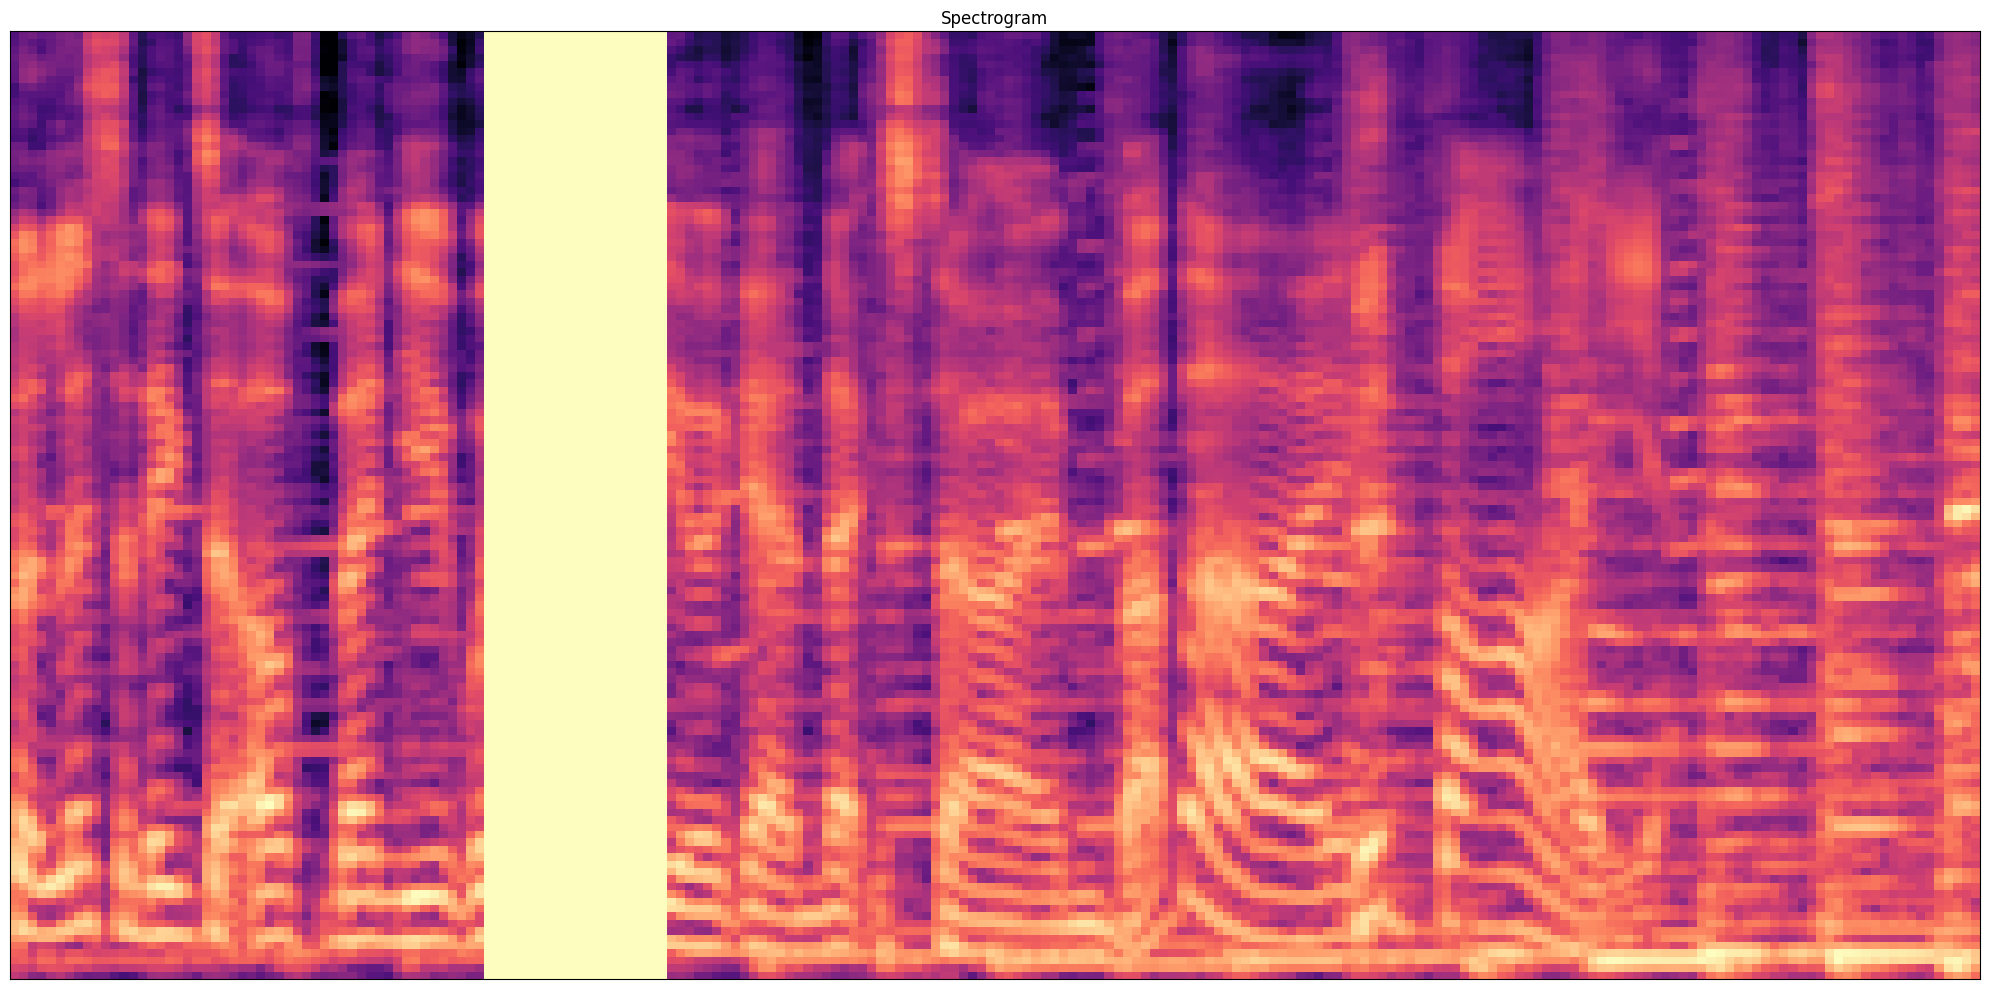

In [36]:
transform = TimeMask(
    min_band_part=0.1,
    max_band_part=0.15,
    fade=True,
    p=1.0,
)

augmented_sound_time_mask = transform(my_waveform_ndarray, sample_rate=16000)
plot_spectrogram(augmented_sound_time_mask, 16000, 1)


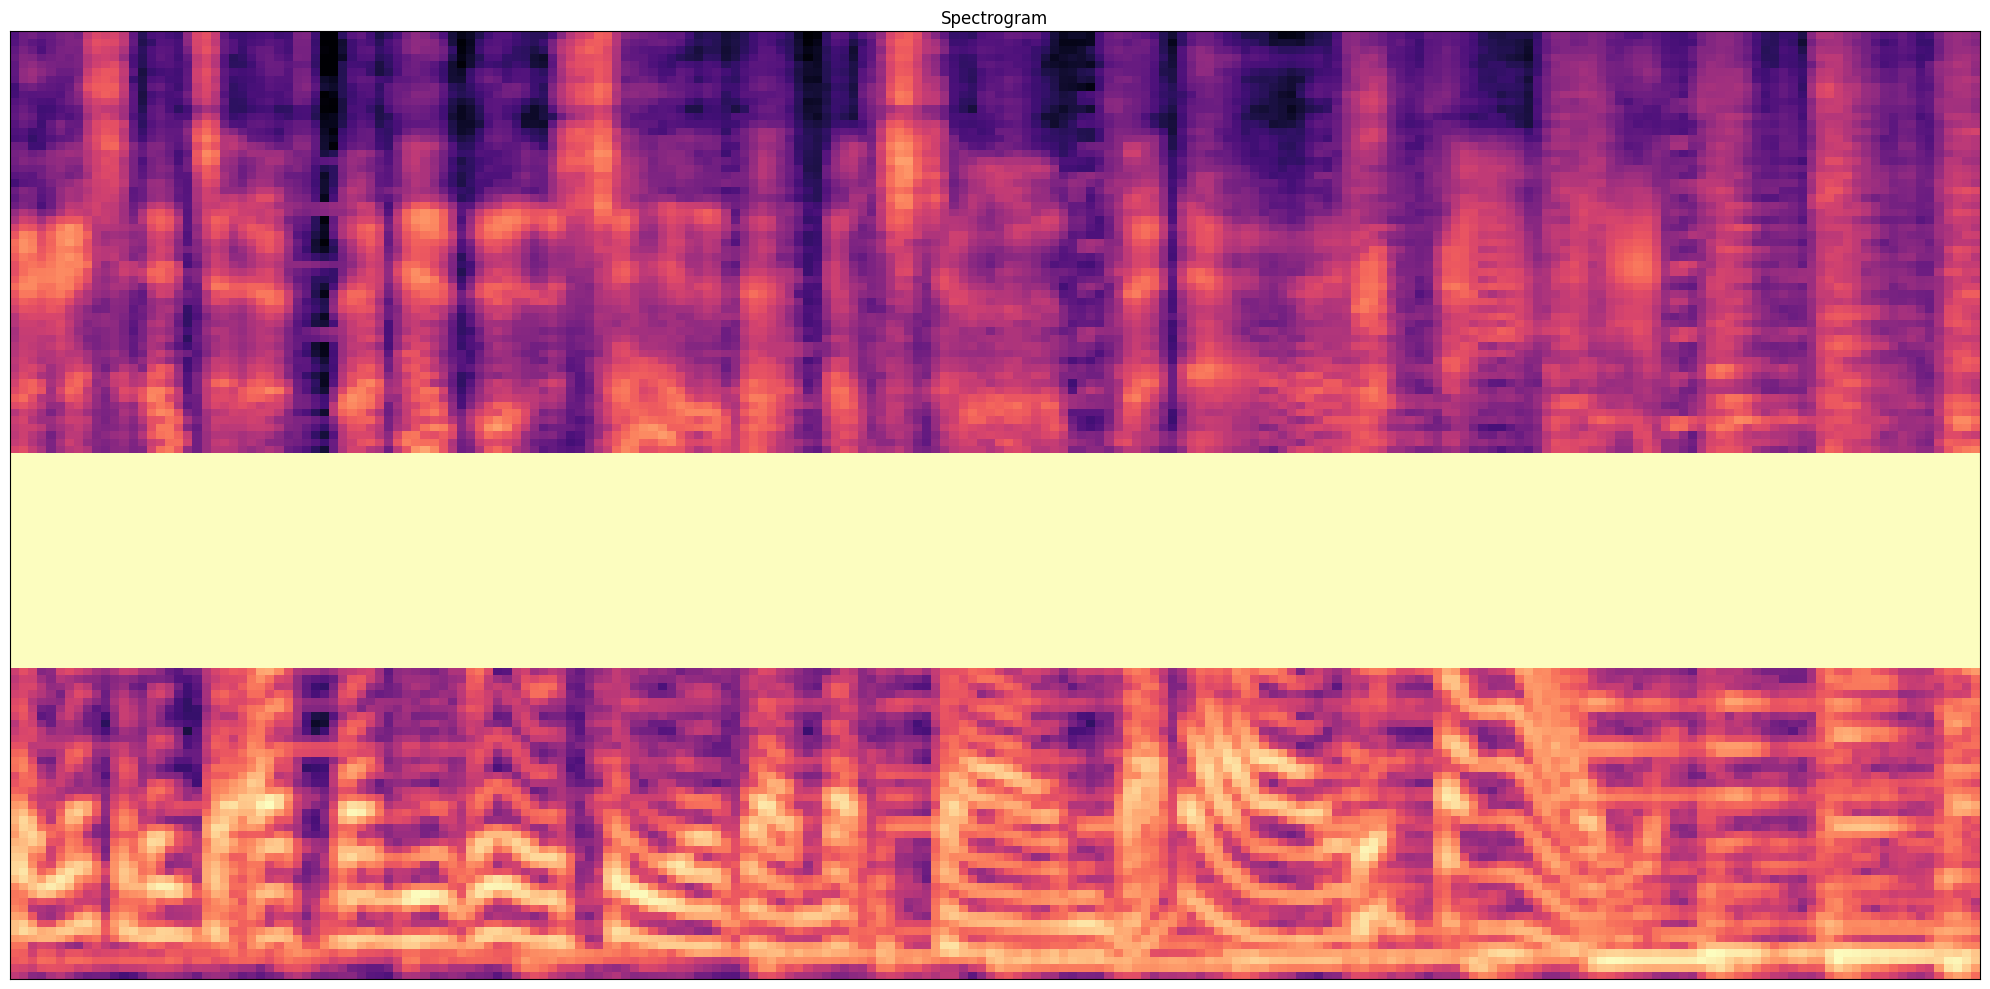

In [97]:
transform = SpecFrequencyMask(p=1.0)
augmented_sound_frequency_mask = transform(my_waveform_ndarray)
plot_spectrogram(augmented_sound_frequency_mask, 16000, 1)


/Users/jenni/.pyenv/versions/3.10.6/envs/podcast-ad-skipper/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=216
  warnings.warn(


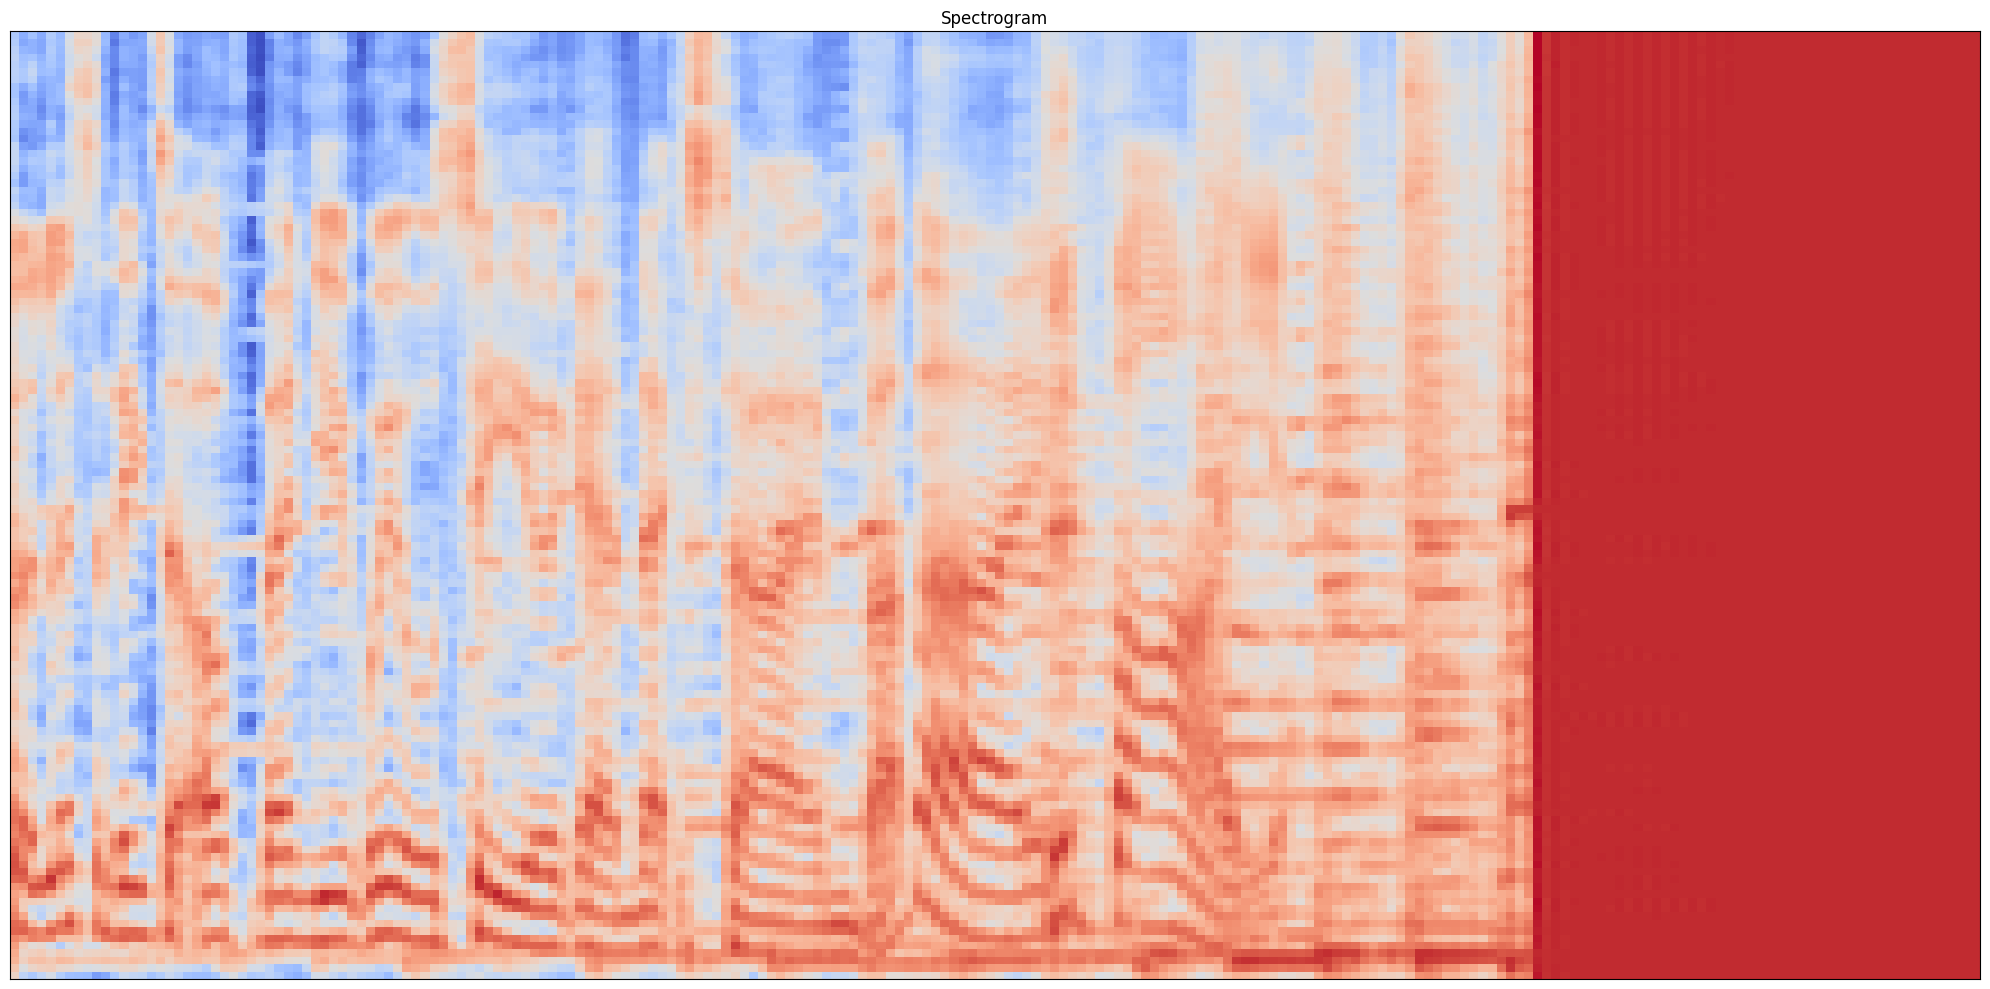

In [38]:
transform = PitchShift(
    min_semitones=-5.0,
    max_semitones=5.0,
    p=1.0
)

augmented_sound_pitch_shift = transform(my_waveform_ndarray, sample_rate=44100)
plot_spectrogram(augmented_sound_pitch_shift, 16000, 1)


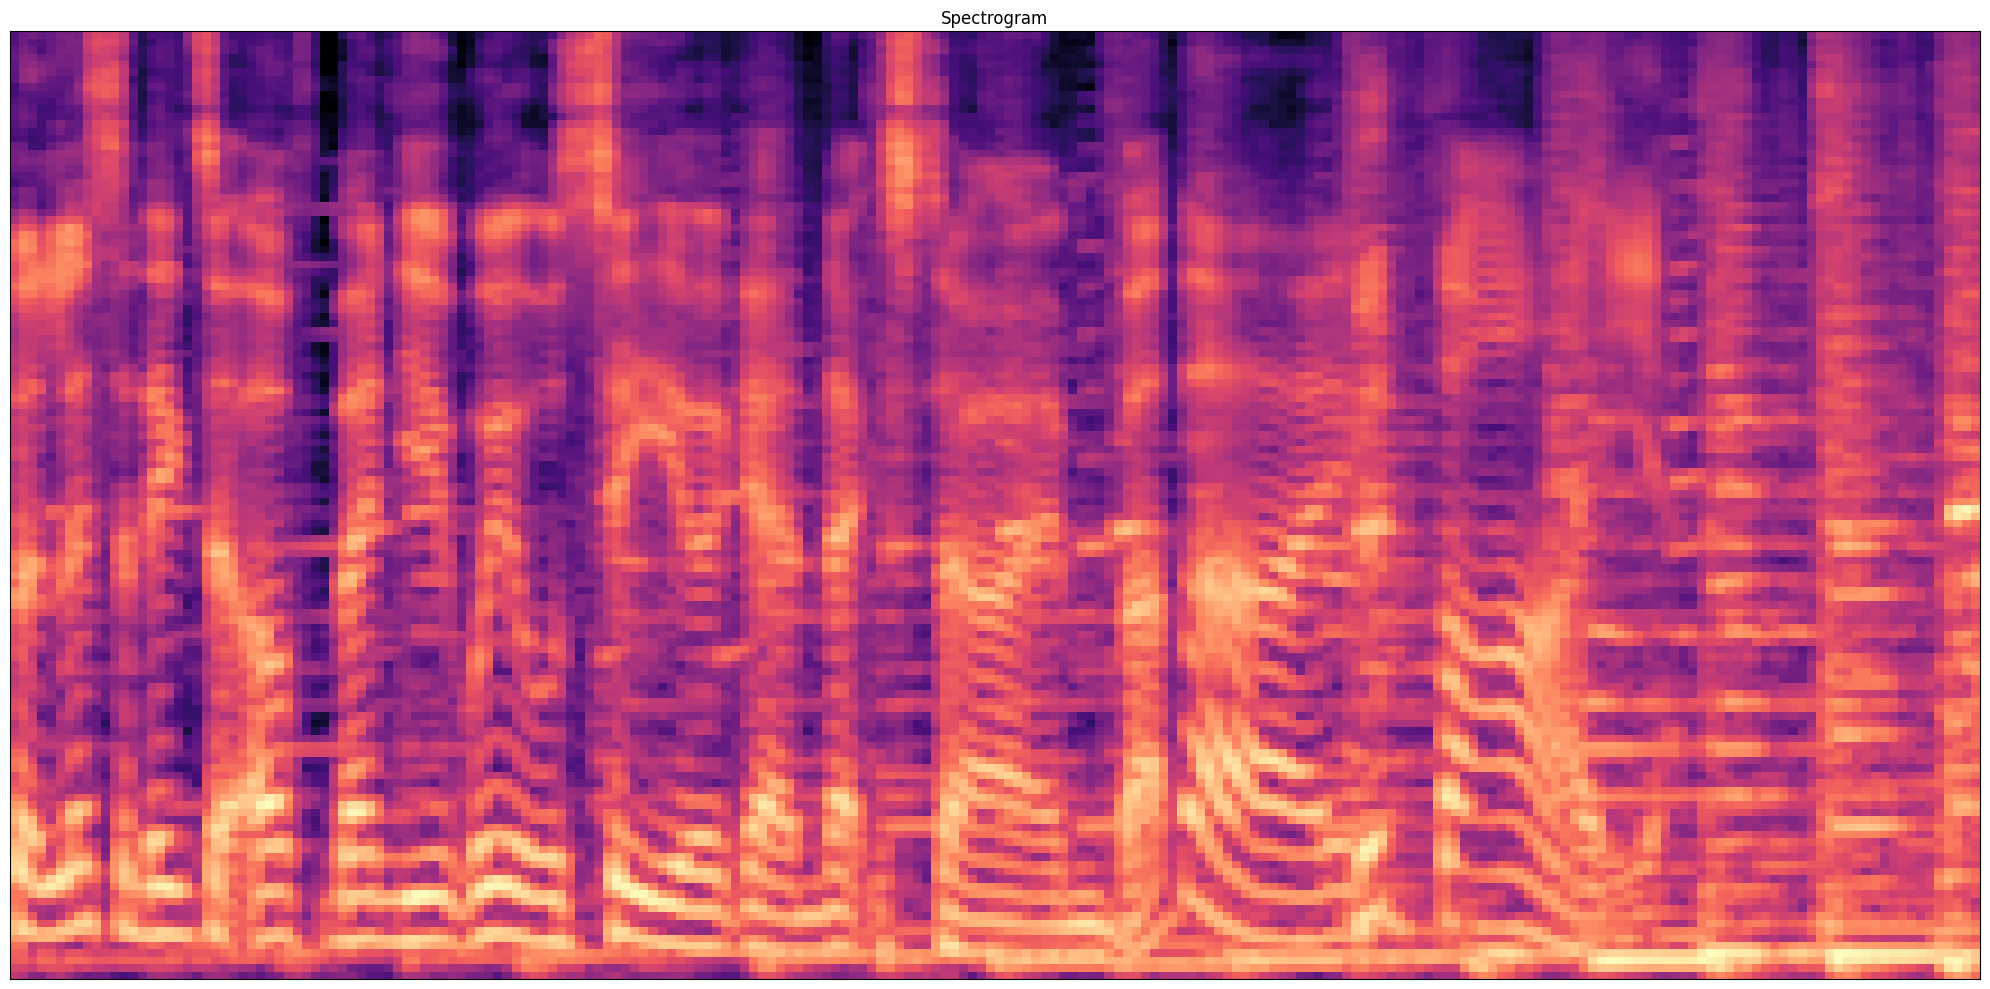

In [70]:
transform = AddGaussianNoise(
    min_amplitude=0.001,
    max_amplitude=0.015,
    p=1.0
)

augmented_sound_add_noise = transform(my_waveform_ndarray, sample_rate=16000)
plot_spectrogram(augmented_sound_add_noise, 16000, 1)


Attempt at converting spectrogram back into audio - not yet working


In [28]:
res = mel_to_audio(spectrogram,
                   fmax=8000
                   )

import soundfile as sf
sf.write("test1.wav", res, 16000)

In [80]:
sr = 16000

Pipeline for augmenting data

In [104]:
augment_timemask = Compose([
    TimeMask(min_band_part=0.1, max_band_part=0.15, fade=True, p=1.0)
])
timemask_spectrogram = augment_timemask(samples=spectrogram,sample_rate=sr)

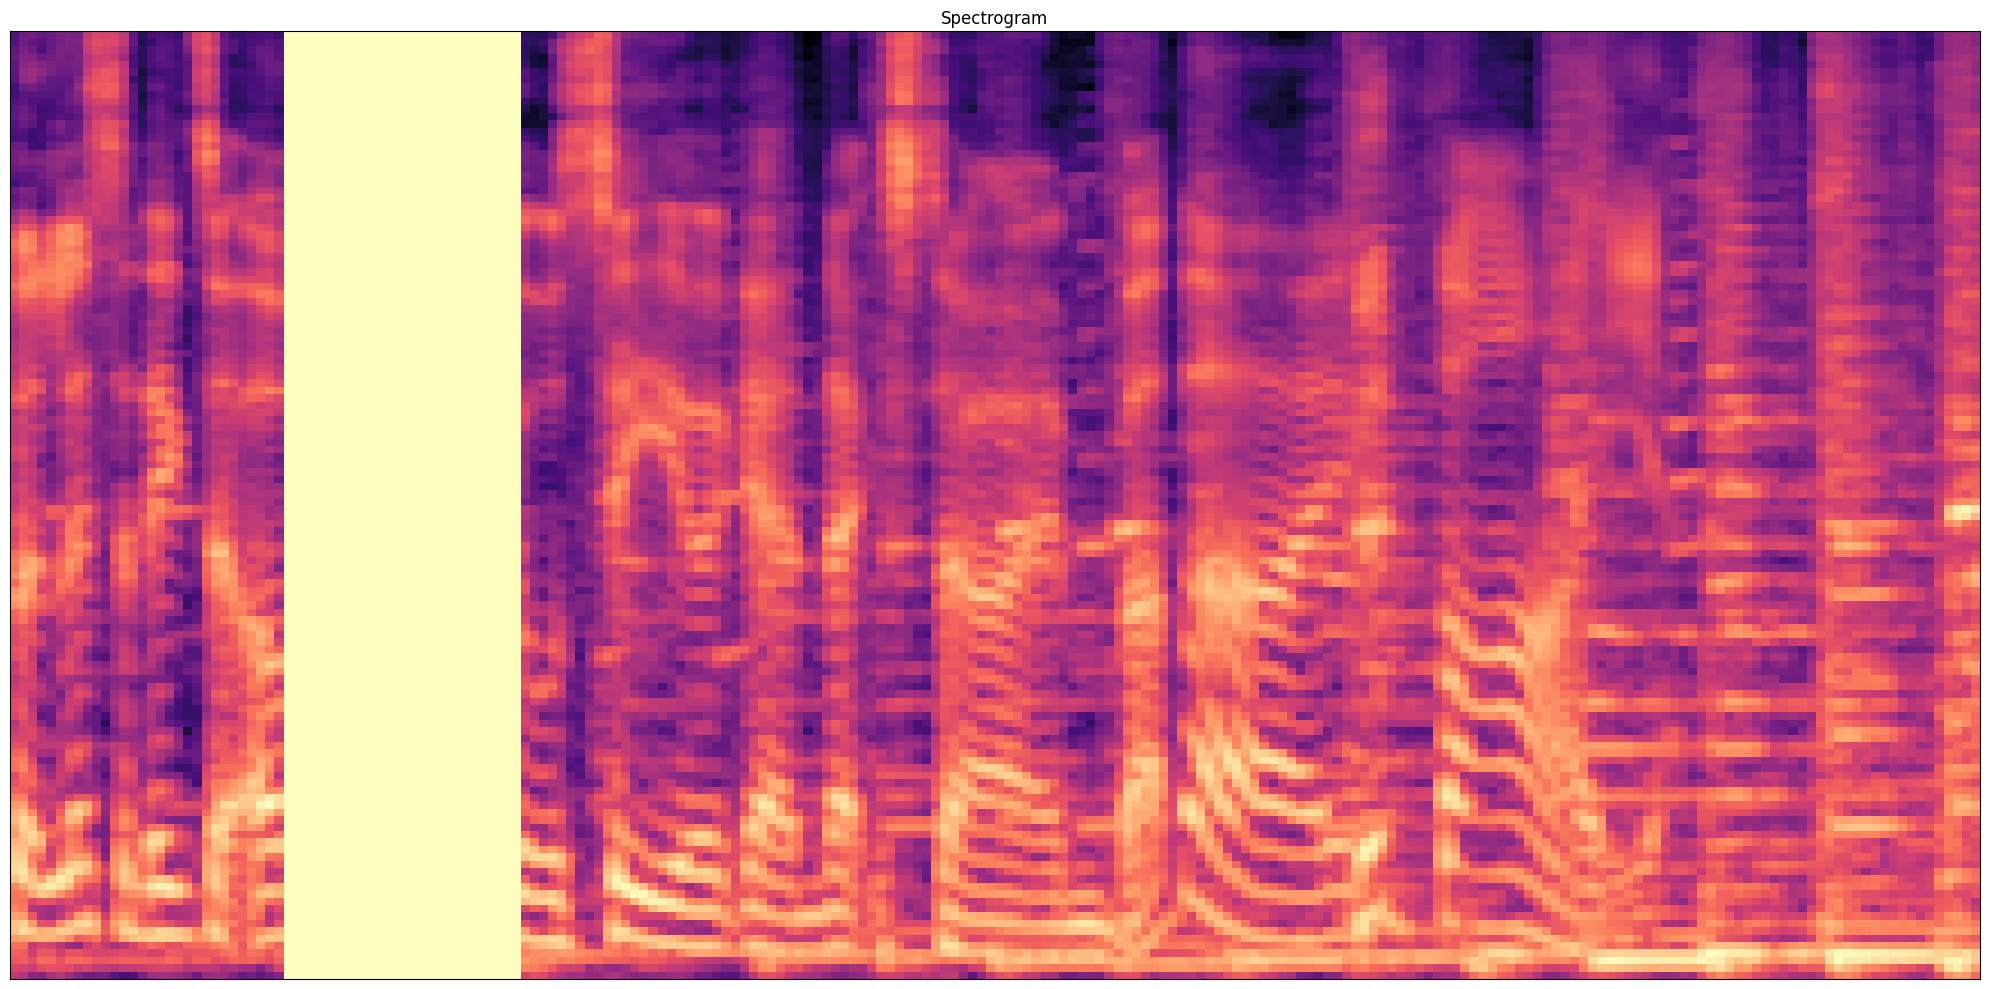

In [66]:
plot_spectrogram(timemask_spectrogram, 16000, 1)

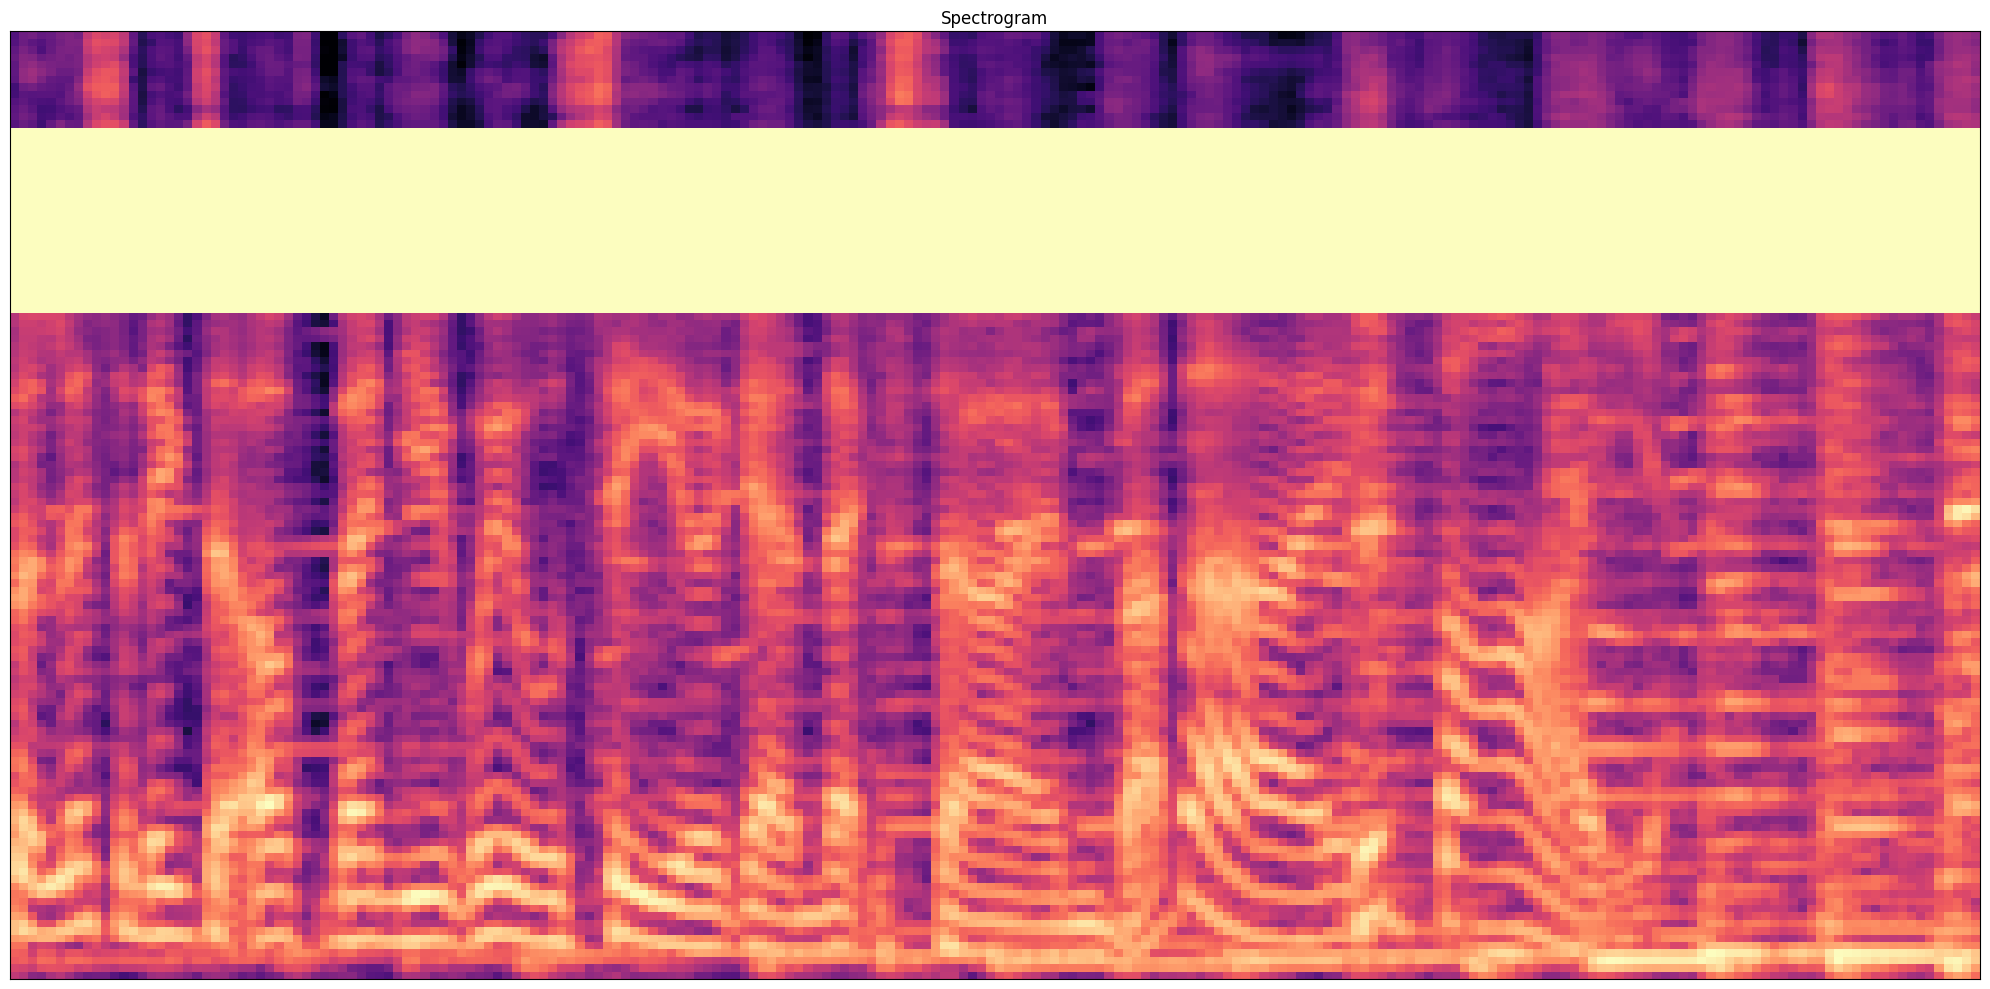

In [106]:
augment_frequencymask = SpecFrequencyMask(p=1.0)
frequencymask_spectrogram = augment_frequencymask(spectrogram)
plot_spectrogram(frequencymask_spectrogram, 16000,1)

In [107]:
augment_noise_pitch_timemask = Compose([
    TimeMask(min_band_part=0.1, max_band_part=0.15, fade=True, p=1.0),
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5)
])
noise_pitch_timemask_spectrogram = augment_noise_pitch_timemask(samples=spectrogram, sample_rate=sr)

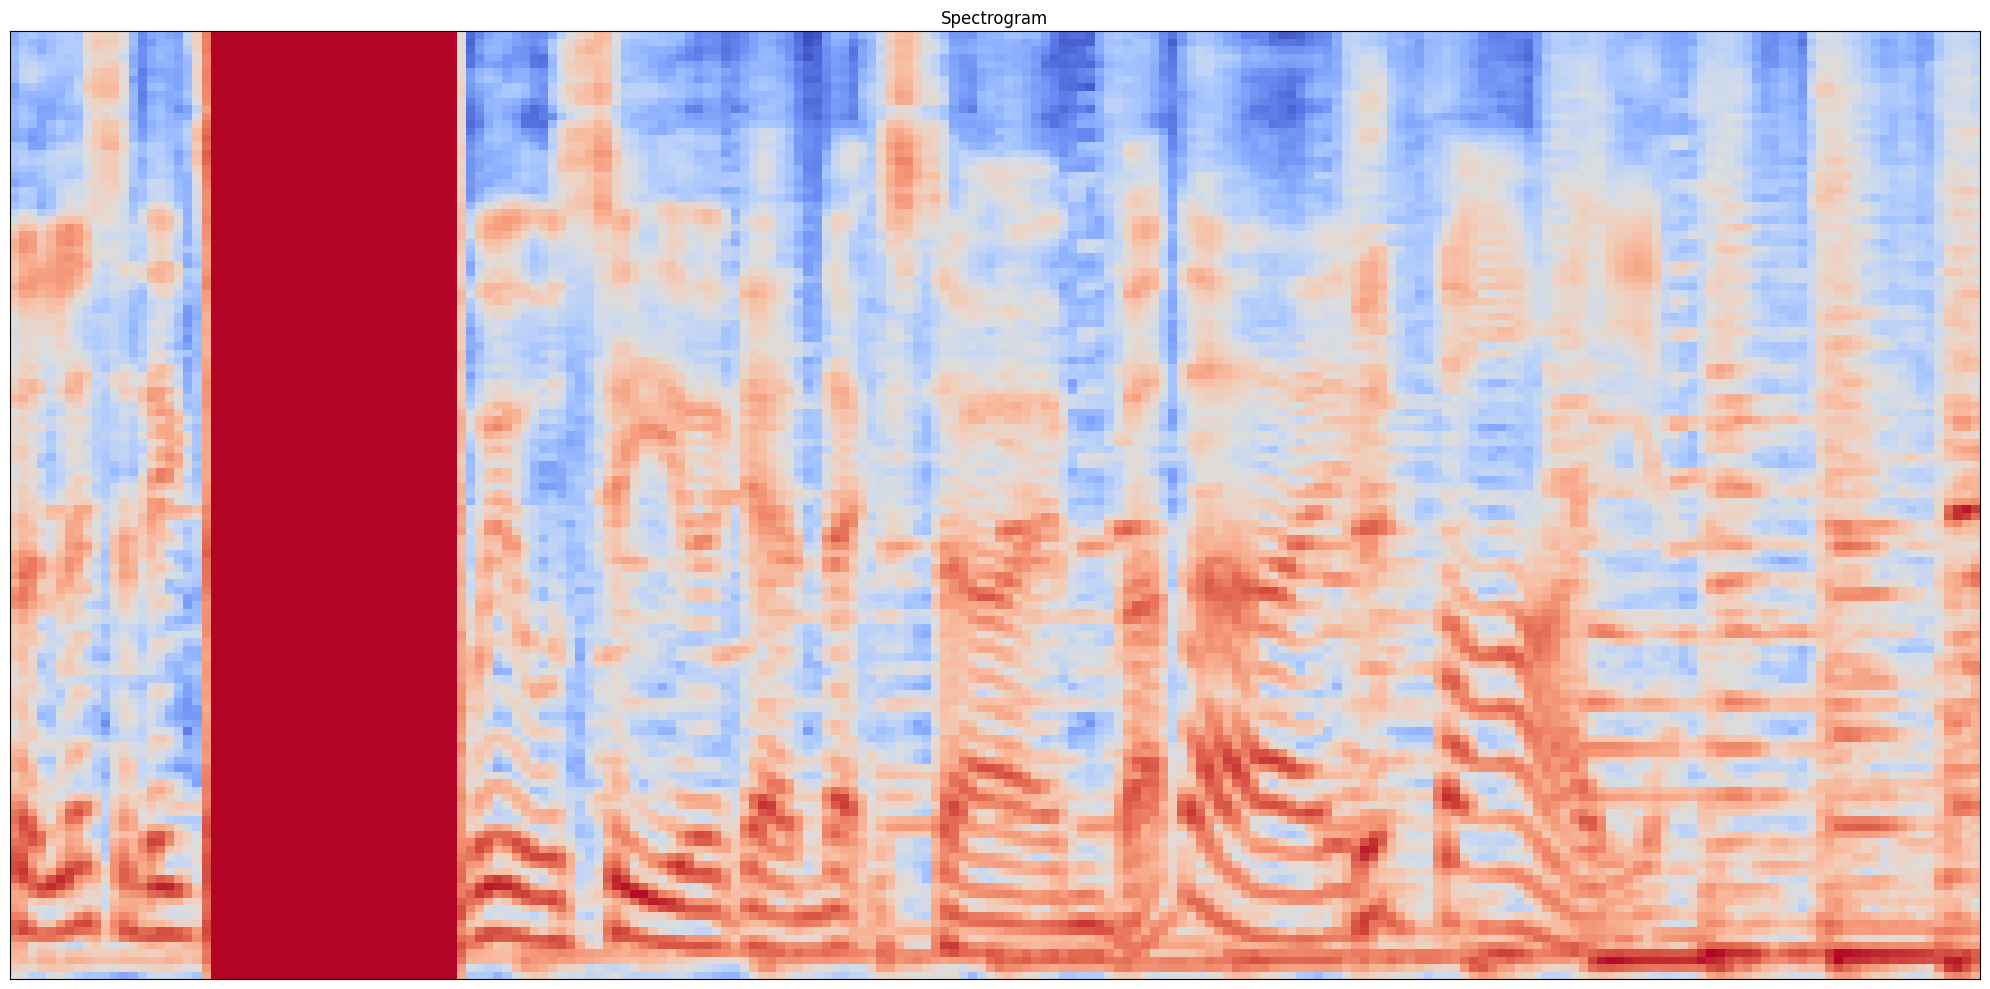

In [108]:
plot_spectrogram(noise_pitch_timemask_spectrogram, 16000,1)

In [111]:
augment_noise_pitch_frequencymask = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
])


In [114]:
spec = augment_noise_pitch_frequencymask(samples=spectrogram, sample_rate=sr)
transform = SpecFrequencyMask(p=1.0)
noise_pitch_frequencymask_spectrogram = transform(spec)

/Users/jenni/.pyenv/versions/3.10.6/envs/podcast-ad-skipper/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=216
  warnings.warn(


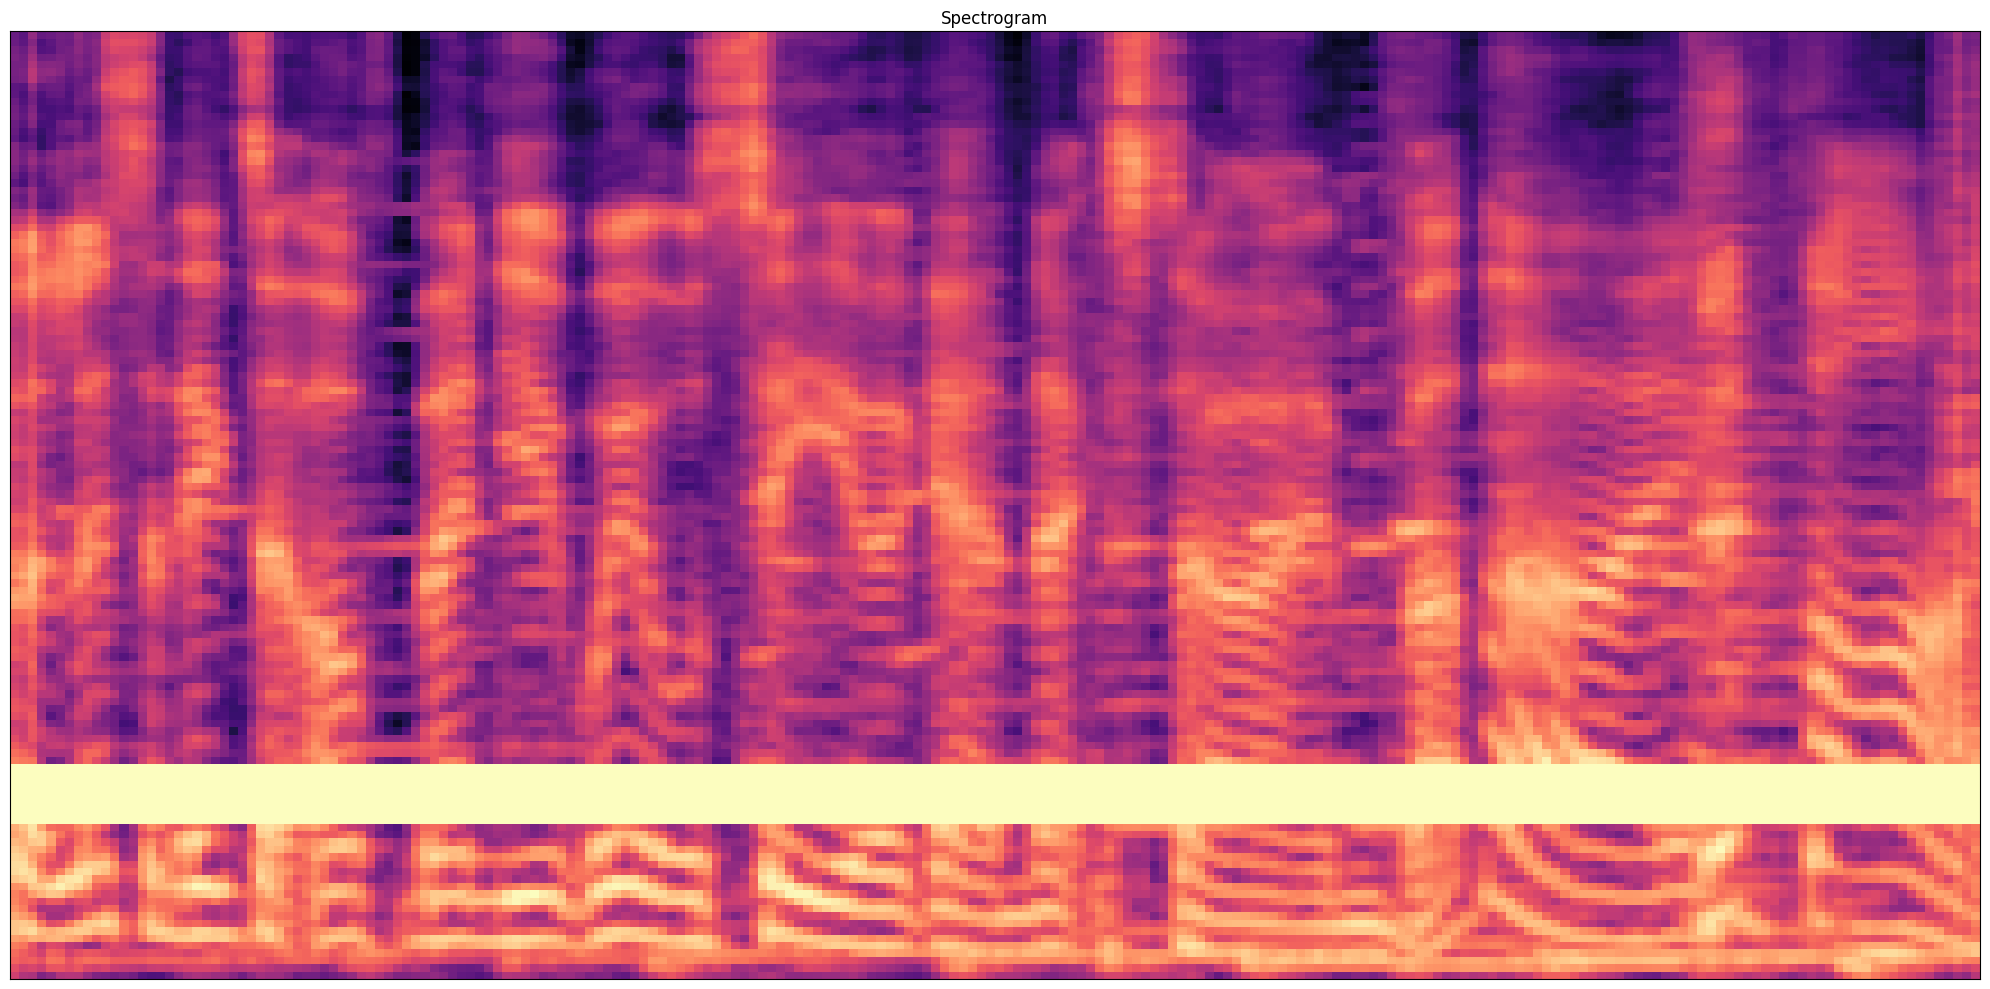

In [115]:
plot_spectrogram(noise_pitch_frequencymask_spectrogram, 16000, 1)